In [ ]:
# install necassry Libraries (if not already installd)
#!pip install pandas numpy matplotlib seaborn scikit-learn


import pandas as np 
import nimpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [ ]:
#load the Iris dataset (Example high-dimensional dataset)
iris = load_iris()
df = pd.DataFrame(iris.data, column=iris.feature_names)
#display first five rows
print("Dataset sample:")
print(df.head())

#check dataset dimensions
print("\nDataset Dimensions:", df.shape)

In [ ]:
# apply PCA to reduse dataset from 4d to 2d
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

#convert to dataframe for visualization
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = iris.target #Add Labels

print("\nReduced Dataset:")
print(df_pca.head())

In [ ]:
#plot PCA-transformd data
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['Target'], palette='viridis')
plt.title("PCA - 2D Projection of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principle Component 2")
plt.legend(title="Species")
plt.show()

Stock Data Sample:
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.099058  469033600
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093890  175884800
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086999  105728000
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089152   86441600
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091737   73449600

Missing Values:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


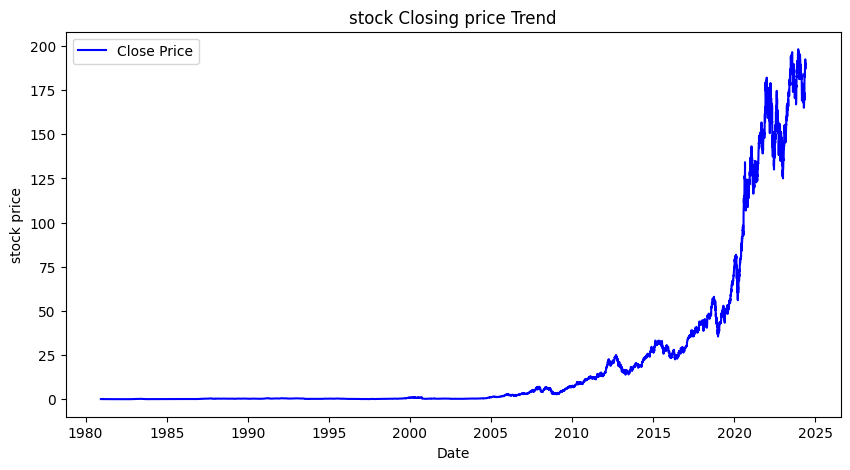


Dataset with Lag Features:
                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093890  175884800   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086999  105728000   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089152   86441600   
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091737   73449600   
1980-12-19  0.126116  0.126674  0.126116  0.126116   0.097335   48630400   

            Prev_Close  
Date                    
1980-12-15    0.128348  
1980-12-16    0.121652  
1980-12-17    0.112723  
1980-12-18    0.115513  
1980-12-19    0.118862  


C:\Users\moham\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\moham\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\moham\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\moham\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  war


Forcast Prices:
10953    189.994586
10954    189.947976
10955    189.946536
10956    189.940796
10957    189.940227
10958    189.939493
10959    189.939374
10960    189.939277
10961    189.939256
10962    189.939243
Name: predicted_mean, dtype: float64


C:\Users\moham\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\moham\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


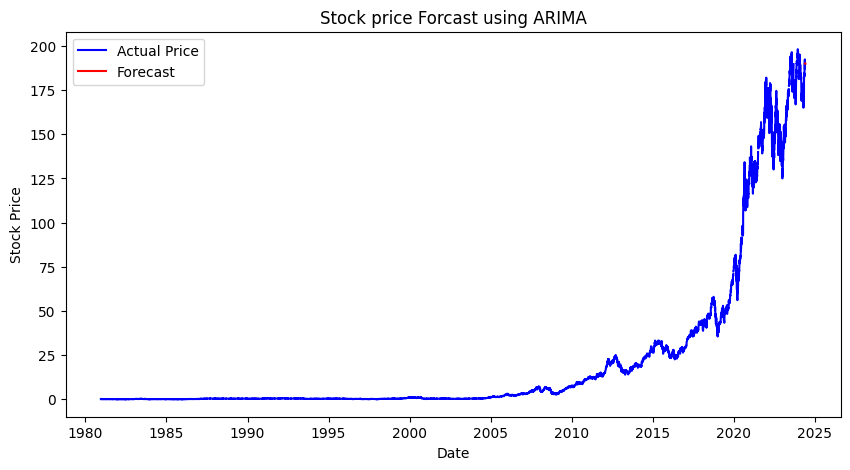

In [10]:
#pip install necessary Libraries
#pip install statsmodels


import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA


#load stack prices dataset
df = pd.read_csv("Apple Dataset.csv", parse_dates=['Date'], index_col='Date')


#Display first few rows
print("Stock Data Sample:")
print(df.head())

#check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


plt.figure(figsize=(10,5))
plt.plot(df.index, df['Close'], label="Close Price", color='blue')
plt.xlabel("Date")
plt.ylabel("stock price")
plt.title("stock Closing price Trend")
plt.legend()
plt.show()


df['Prev_Close'] = df['Close'].shift(1)

#Drop missing values (first row)
df.dropna(inplace=True)

print("\nDataset with Lag Features:")
print(df.head())


#difine ARIMA model (p=2, d=1, q=2)
model = ARIMA(df['Close'], order=(2,1,2))
model_fit = model.fit()

df = df.asfreq('B')
#forcast next 10 days
forecast = model_fit.forecast(steps=10)
print("\nForcast Prices:")
print(forecast)

future_dates = pd.date_range(start=df.index[-1], periods=11, freq='B')[1:]

plt.figure(figsize=(10,5))
plt.plot(df.index, df['Close'], label="Actual Price", color='blue')
plt.plot(pd.date_range(start=df.index[-1],periods=11, freq='D')[1:], forecast, label="Forecast", color="red")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock price Forcast using ARIMA")
plt.legend()
plt.show()